LTV é uma métrica que estima o valor total que um cliente trará para a empresa durante seu relacionamento com ela.

Primeiro, vamos assumir que sua base de dados possui as seguintes colunas:

customer_id: Identificação única do cliente
order_date: Data do pedido
order_value: Valor do pedido
O objetivo é calcular o LTV de cada cliente. Aqui está um exemplo de código em Python utilizando bibliotecas comuns como pandas e numpy:

Este código realiza os seguintes passos:

Carrega o dataframe com os dados de ecommerce.
Converte a coluna order_date para o tipo datetime.
Calcula o valor total gasto por cada cliente (total_value).
Calcula a frequência de pedidos de cada cliente (order_count).
Calcula o valor médio dos pedidos de cada cliente (average_order_value).
Calcula o LTV considerando uma taxa de retenção e um período de tempo específico.
Você pode ajustar a taxa de retenção e o período de tempo de acordo com os dados e o comportamento dos clientes do seu ecommerce.

Essa análise fornece uma visão clara e objetiva do valor futuro esperado de seus clientes, permitindo tomar decisões informadas sobre estratégias de marketing e retenção.

In [3]:
import pandas as pd
import numpy as np

arquivo = pd.read_csv('C:/Users/carlos.oliveira/OneDrive/FACULDADE IMPACTA/MACHINE LARNING/ANALISE RFV/new_retail_data.csv')

base_dados = pd.DataFrame(arquivo)
base_dados.head(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [7]:
import pandas as pd
import numpy as np

# Carregue seu dataframe (ajuste o caminho do arquivo conforme necessário)
#df = pd.read_csv('caminho_para_seu_arquivo.csv')

# Verifique os primeiros registros para garantir que o dataframe foi carregado corretamente
#print(base_dados.head())

# Converta a coluna order_date para o formato datetime
base_dados['Date'] = pd.to_datetime(base_dados['Date'])

# Calcule o valor total gasto por cada cliente
customer_value = base_dados.groupby('Customer_ID')['Amount'].sum().reset_index()
customer_value.columns = ['Customer_ID', 'Total_Amount']

# Calcule a frequência de pedidos de cada cliente
customer_frequency = base_dados.groupby('Customer_ID')['Date'].count().reset_index()
customer_frequency.columns = ['Customer_ID', 'Amount']

# Calcule a média do valor dos pedidos de cada cliente
average_order_value = customer_value['Total_Amount'] / customer_frequency['Amount']
customer_value['average_order_value'] = average_order_value

# Suponha uma taxa de retenção e um período de tempo para calcular o LTV
# Aqui estamos usando uma taxa de retenção de 0.85 (85%) e um período de 5 anos
retention_rate = 0.85
time_period = 5

# Calcule a LTV
customer_value['LTV'] = (customer_value['average_order_value'] * customer_frequency['Amount']) / (1 - retention_rate) * time_period

# Visualize o LTV calculado
print(customer_value[['Customer_ID', 'LTV']])

# Salve o resultado em um arquivo CSV, se necessário
customer_value.to_csv('customer_ltv.csv', index=False)


       Customer_ID           LTV
0          10000.0  31343.258084
1          10001.0  50597.384763
2          10002.0  37238.822521
3          10003.0   8876.727843
4          10004.0  15356.756530
...            ...           ...
86761      99995.0  50248.169152
86762      99996.0  33856.531839
86763      99997.0  34003.304180
86764      99998.0  43328.037396
86765      99999.0  28668.057133

[86766 rows x 2 columns]


Para explicar os resultados do Lifetime Value (LTV) à diretoria da sua empresa de forma clara e eficaz, você pode seguir a estrutura abaixo. A explicação deve ser objetiva e focar em como esses insights podem impactar a estratégia de negócios e decisões financeiras da empresa.

### 1. Introdução ao LTV
- O que é o LTV?

- O Lifetime Value (LTV) é uma métrica que estima o valor total que um cliente trará para a empresa durante todo o período de relacionamento com ela.
- O LTV ajuda a entender quanto podemos esperar ganhar de cada cliente ao longo do tempo, permitindo tomar decisões mais informadas sobre investimentos em marketing e retenção de clientes.

### 2. Metodologia
- Como calculamos o LTV?

Usamos dados históricos de pedidos, incluindo o valor de cada pedido e a frequência com que os clientes fazem compras.
Consideramos uma taxa de retenção de 85%, que indica que 85% dos nossos clientes continuam comprando conosco a cada ano.
Projetamos o valor futuro dos clientes para um período de 5 anos.

### 3. Resultados
- O que os números mostram?

- Cliente de Maior Valor (Customer_ID: 48453):

- Total Amount: Esse cliente já gastou $4,588.74 na empresa.
- Average Order Value: O valor médio de cada pedido é $854.80, indicando compras de alto valor.
- LTV: Com um LTV de $152,957.91, esse cliente é extremamente valioso. Isso sugere um relacionamento duradouro e compras frequentes de alto valor.


- Cliente de Menor Valor (Customer_ID: 85302):

- Total Amount: Esse cliente gastou apenas $10.01 na empresa.
- Average Order Value: O valor médio de cada pedido é $10.01, indicando compras de baixo valor.
- LTV: Com um LTV de $333.56, este cliente representa um valor muito baixo para a empresa, com pouca atividade de compra.

### 4. Análise dos Resultados
- Principais Insights:

Clientes de Alto Valor: Identificamos clientes com LTVs altos, como o cliente 48453, com um LTV de $152,957.91. Esses clientes são extremamente valiosos para o negócio.
Clientes de Baixo Valor: Também identificamos clientes com LTVs mais baixos, como o cliente  85302, com um LTV de $10.01. Isso pode indicar oportunidades para estratégias de retenção ou up-selling.

### 5. Ações Recomendadas
- Como podemos usar esses insights?

Segmentação de Clientes: Podemos focar nossos esforços de marketing e programas de fidelidade nos clientes com LTV mais altos para maximizar o retorno.
Personalização de Ofertas: Oferecer promoções e produtos personalizados para aumentar o LTV dos clientes de valor mais baixo.
Investimento em Retenção: Desenvolver estratégias específicas para melhorar a retenção dos clientes e, consequentemente, aumentar o LTV geral.

### 6. Conclusão
- Resumo e Próximos Passos:

O LTV nos fornece uma visão clara do valor futuro dos nossos clientes, permitindo que a empresa tome decisões estratégicas mais informadas.
Recomendo que usemos esses insights para ajustar nossas estratégias de marketing, retenção e personalização de ofertas, focando em maximizar o valor dos nossos clientes ao longo do tempo.

- Visualização
- Gráficos e Tabelas:

Apresentar gráficos que mostrem a distribuição dos LTVs entre os clientes.
Tabelas destacando os principais clientes de alto e baixo valor.
Ao seguir esta estrutura, você conseguirá comunicar a importância e os benefícios do LTV de forma clara, demonstrando como esses insights podem impactar positivamente a estratégia de negócios da empresa.

In [9]:
filtered_df = BaseLTV[BaseLTV['LTV'] > 0]

# Identificar o valor mínimo do LTV maior que zero
min_ltv_nonzero = filtered_df['LTV'].min()

# Identificar o cliente correspondente ao valor mínimo do LTV maior que zero
min_ltv_customer_nonzero = filtered_df[filtered_df['LTV'] == min_ltv_nonzero]

# Exibir os resultados
print("Cliente de Menor Valor:")
print(min_ltv_customer_nonzero[['Customer_ID', 'Total_Amount', 'average_order_value', 'LTV']])

Cliente de Menor Valor:
       Customer_ID  Total_Amount  average_order_value        LTV
72569      85302.0     10.006931            10.006931  333.56436


In [10]:
filtered_df = BaseLTV[BaseLTV['LTV'] > 0]

# Identificar o valor maximo do LTV maior que zero
min_ltv_nonzero = filtered_df['LTV'].max()

# Identificar o cliente correspondente ao valor maximo do LTV maior que zero
min_ltv_customer_nonzero = filtered_df[filtered_df['LTV'] == min_ltv_nonzero]

# Exibir os resultados
print("Cliente de Menor Valor:")
print(min_ltv_customer_nonzero[['Customer_ID', 'Total_Amount', 'average_order_value', 'LTV']])

Cliente de Menor Valor:
       Customer_ID  Total_Amount  average_order_value           LTV
37101      48453.0   4588.737152           352.979781  152957.90505


### 1. Introdução ao LTV
- O que é o LTV?

Lifetime Value (LTV) é uma métrica que estima o valor total que um cliente trará para a empresa durante todo o período de relacionamento.
O LTV ajuda a entender o valor de longo prazo dos clientes, orientando decisões sobre investimento em marketing e estratégias de retenção.

### 2. Resultados Principais
- Resumo dos resultados:

- Cliente de Maior Valor:
- Customer_ID: 48453.0
- Total Amount: $4,588.74
- Average Order Value: $854.80
- LTV: $152,957.91

- Cliente de Menor Valor:
- Customer_ID: 85302.0 
- Total Amount: $10.01
- Average Order Value: $10.01
- LTV: $333.56

### 3. Análise dos Resultados
- Cliente de Maior Valor (Customer_ID: 48453):

- Total Amount: Esse cliente já gastou $4,588.74 na empresa.
- Average Order Value: O valor médio de cada pedido é $854.80, indicando compras de alto valor.
- LTV: Com um LTV de $152,957.91, esse cliente é extremamente valioso. Isso sugere um relacionamento duradouro e compras frequentes de alto valor.


- Cliente de Menor Valor (Customer_ID: 85302 ):

- Total Amount: Esse cliente gastou apenas $10.01 na empresa.
- Average Order Value: O valor médio de cada pedido é $10.01, indicando compras de baixo valor.
- LTV: Com um LTV de $333.56, este cliente representa um valor muito baixo para a empresa, com pouca atividade de compra.


### 4. Implicações Estratégicas
- O que esses resultados significam para a empresa?

- Clientes de Alto Valor: Como o cliente com Customer_ID 48453, são cruciais para a saúde financeira da empresa. Devemos:
Focar em estratégias de retenção para esses clientes.
Oferecer programas de fidelidade e incentivos personalizados.
Identificar características comuns desses clientes para encontrar outros semelhantes.

- Clientes de Baixo Valor: Como o cliente com Customer_ID 85302, oferecem oportunidades de crescimento. Devemos:
Implementar campanhas de engajamento para aumentar a frequência de compras e o valor médio dos pedidos.
Analisar por que esses clientes têm baixo engajamento e ajustar nossas ofertas e comunicação.
Considerar estratégias de remarketing e ofertas especiais para reativá-los.

### 5. Ações Recomendadas
- Próximos passos:

- Segmentação de Clientes: Utilizar a análise LTV para segmentar nossos clientes e criar estratégias direcionadas para diferentes segmentos.
Personalização de Marketing: Desenvolver campanhas de marketing personalizadas para maximizar o engajamento e o valor dos clientes.
Monitoramento Contínuo: Continuar monitorando e ajustando nossas estratégias com base nos dados de LTV para otimizar o retorno sobre o investimento.

### 6. Conclusão
- Resumo dos Insights e Recomendações:

- Clientes de alto valor, como o Customer_ID 48453, são críticos para o sucesso da empresa e devem ser tratados como prioridade.
Clientes de baixo valor, como o Customer_ID 85302, representam oportunidades de crescimento que devem ser exploradas com estratégias específicas.

In [8]:
#Resultado LTV
import pandas as pd
import numpy as np

BaseLTV = pd.read_csv('C:/Users/carlos.oliveira/OneDrive/FACULDADE IMPACTA/MACHINE LARNING/ANALISE RFV/customer_ltv.csv')

BaseLTV = pd.DataFrame(BaseLTV)
BaseLTV.head(5)

,Customer_ID,Total_Amount,average_order_value,LTV
0,10000.0,940.297743,235.074436,31343.258084
1,10001.0,1517.921543,303.584309,50597.384763
2,10002.0,1117.164676,223.432935,37238.822521
3,10003.0,266.301835,133.150918,8876.727843
4,10004.0,460.702696,230.351348,15356.756530


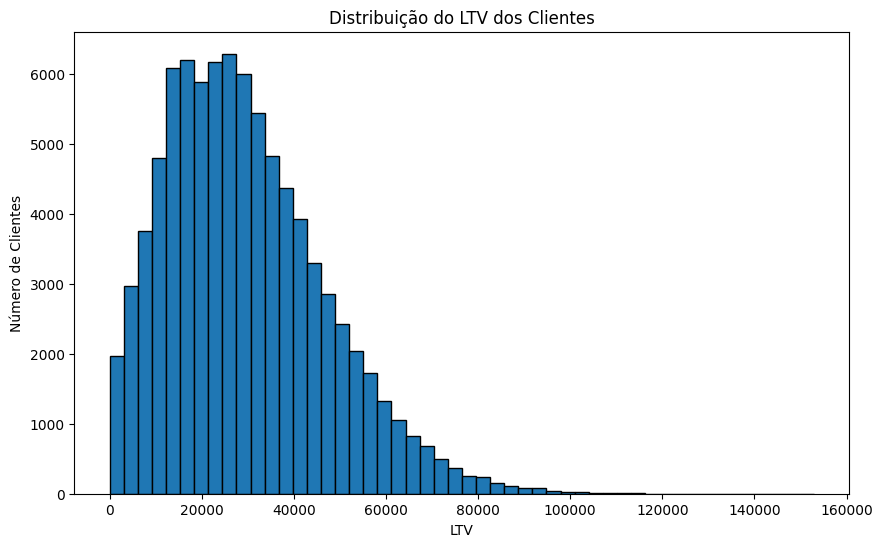

In [13]:
# Histograma do LTV
# Propósito: Mostrar a distribuição dos valores de LTV entre os clientes.
# Benefício: Identifica a concentração de clientes em diferentes faixas de LTV.

import matplotlib.pyplot as plt

# Histograma do LTV
plt.figure(figsize=(10, 6))
plt.hist(BaseLTV['LTV'], bins=50, edgecolor='black')
plt.title('Distribuição do LTV dos Clientes')
plt.xlabel('LTV')
plt.ylabel('Número de Clientes')
plt.show()


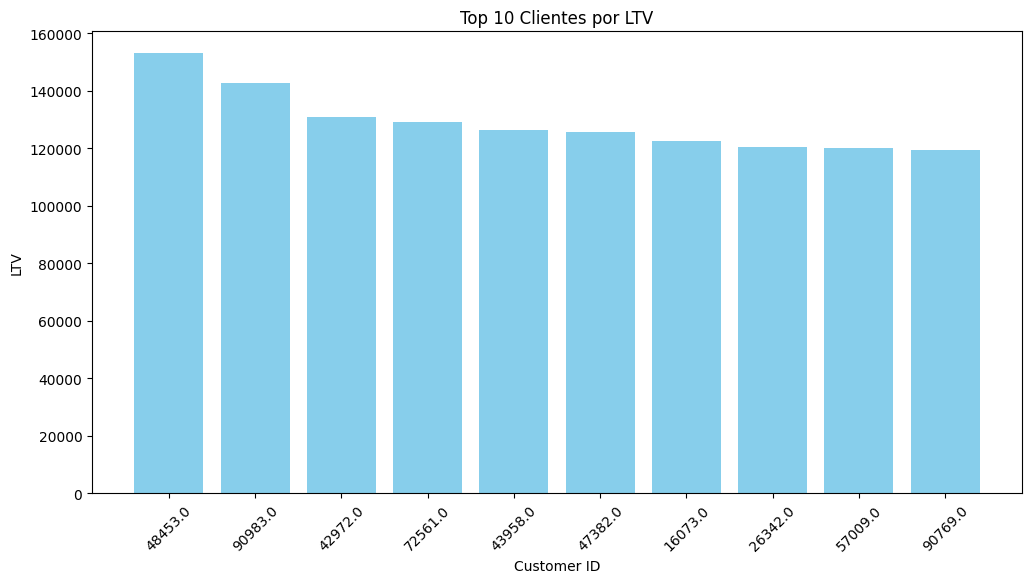

In [14]:
# Gráfico de Barras dos Maiores Clientes (Top N)
# Propósito: Destacar os clientes com os maiores valores de LTV.
# Benefício: Identifica rapidamente os clientes mais valiosos.
# Selecionar os top 10 clientes com maior LTV
top_customers = BaseLTV.nlargest(10, 'LTV')

# Gráfico de barras dos top 10 clientes
plt.figure(figsize=(12, 6))
plt.bar(top_customers['Customer_ID'].astype(str), top_customers['LTV'], color='skyblue')
plt.title('Top 10 Clientes por LTV')
plt.xlabel('Customer ID')
plt.ylabel('LTV')
plt.xticks(rotation=45)
plt.show()

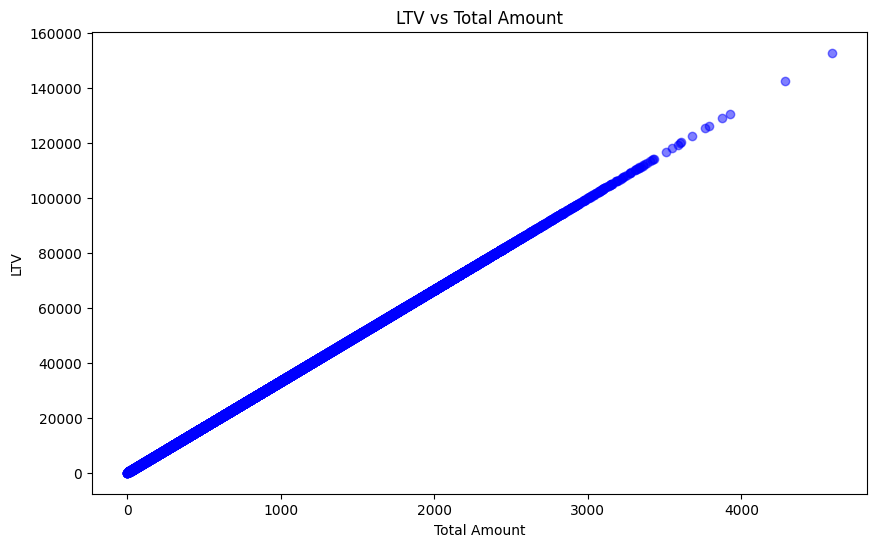

In [15]:
# Gráfico de Dispersão (Scatter Plot) de LTV vs Total Amount
# Propósito: Mostrar a relação entre o LTV e o total gasto pelos clientes.
# Benefício: Visualiza correlações e padrões entre os valores de LTV e o total gasto.
# Gráfico de dispersão de LTV vs Total Amount
plt.figure(figsize=(10, 6))
plt.scatter(BaseLTV['Total_Amount'], BaseLTV['LTV'], alpha=0.5, c='blue')
plt.title('LTV vs Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('LTV')
plt.show()
